## Project Summary

Name of project: **My Vivino** <br>
Task: **Perfoming data analysis on different types wines collected from vivino.com** <br>
**About the dataset:**

The data was collected by scraping using the popular web automation library in python called Selenium. It was collected from vivino.com. The number of wine information collected is 1200 consisting of 6 different types of wines namely:
**Red**, **Rose**, **Sparkly**, **Fortified**, **Dessert**, and **White**.
The wines collected include ratings on a scale of 5
The price for the wines collected is from 10 dollars up until 500 dollars
The data collected will be cleaned, processed, and then used for analysis by answering the research questions below.

**Research Questions:**
1.	How does the average rating of each wine type compare to its price?
2. Which wine type has the highest average rating?
3. What is the distribution of prices for each wine type in the dataset?
4. Which country produces the most wine in the dataset?
5. Which country produces the best wine based on the ratings?
6. Does the year of production affect the Price of the Wine?


## Part 1

### Data Cleaning

In [1]:
# installing seaborn
!pip install seaborn
# importing various libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

     |████████████████████████████████| 292 kB 16.1 MB/s            


In [2]:
## reading in the datasets and then mergin then into one to work with

rose = pd.read_csv('vivino_dataset_rose.csv')
red = pd.read_csv('vivino_dataset_red.csv')
fortified = pd.read_csv('vivino_dataset_fortified.csv')
white = pd.read_csv('vivino_dataset_white.csv')
dessert = pd.read_csv('vivino_dataset_dessert.csv')
sparkling = pd.read_csv('vivino_dataset_sparkling.csv')

# create a column called type that will have the type of wine for each dataset before merging
rose['Type'] = 'rose'
red['Type'] = 'red'
fortified['Type'] = 'fortified'
white['Type'] = 'white'
dessert['Type'] = 'dessert'
sparkling['Type'] = 'Sparkling'

## merging the data
data = pd.concat([rose, red, fortified, white, dessert, sparkling], axis = 0)
## reseting the index of the data 
data.reset_index(inplace = True, drop = True)

In [3]:
# setting the columns to lower case
data.columns = data.columns.str.lower()

In [4]:
data.shape

(1200, 7)

In [5]:
data.sample(8)

,brand,name,location,rating,number of ratings,price,type
206,Isla Rae,Isla Rae\nSui Generis Edition Cabernet Sauvign...,"Napa Valley, United States",3.4,44 ratings,24.99,red
291,Château Haut Prieur,Château Haut Prieur\nBlaye - Côtes de Bordeaux...,"Blaye - Côtes de Bordeaux, France",4.2,246 ratings,15.99,red
199,Arnot-Roberts,Arnot-Roberts\nRosé 2019,"Clear Lake, United States",4.3,121 ratings,Available online from $32,rose
433,Niepoort,Niepoort\nColheita Port 1997,"Porto, Portugal",4.4,347 ratings,74.94,fortified
55,Domaine Lafage,Domaine Lafage\nMiraflors Rosé 2021,"Côtes du Roussillon, France",4.0,341 ratings,16.95,rose
1167,Laurent-Perrier,Laurent-Perrier\nHarmony Demi-Sec Champagne N.V.,"Champagne, France",4.1,1347 ratings,72.99,Sparkling
1140,Aubry,Aubry\nIvoire & Ébène Brut Champagne 1er Cru 2014,"Champagne, France",4.2,27 ratings,56.99,Sparkling
901,Klein Constantia,Klein Constantia\nVin de Constance (Natural Sw...,"Constantia, South Africa",4.6,751 ratings,Available online from $181.98,dessert


In [6]:
## extracting rating and converting the datatype to integer
data['nbr_ratings'] = data['number of ratings'].apply(lambda x: x.split(' ')[0]).astype('int')
data.nbr_ratings.sample(5)

953      203
53       489
1072     372
848     1054
1021     925
Name: nbr_ratings, dtype: int64

In [7]:
## extracting the price and converting the datatype to int
data['price'] = data['price'].apply(lambda x: str(x).split(' ')[-1].split('$')[-1]).astype('float64')
data['price'].sample(5)

440      99.99
1197     54.95
766      48.10
1077    269.99
685      59.95
Name: price, dtype: float64

In [8]:
## extracting the country of origin from the location
data['country'] = data['location'].apply(lambda x: x.split(',')[-1].strip())
data.country.sample(5)

65             France
888            France
24              Italy
1183    United States
242            France
Name: country, dtype: object

In [9]:
## extracting the state of origin from the location
data['state'] = data['location'].apply(lambda x: x.split(',')[0].strip())
data.state.sample(5)

6           Bandol
990    Napa Valley
654        Mendoza
662    Napa Valley
688        Chablis
Name: state, dtype: object

In [10]:
## collecting the year of production from name column as the year is attached to the name of the wine
data['year'] = data['name'].apply(lambda x: x.split(' ')[-1])



In [11]:
def filter_year(value):
    try:
        value = int(value)
    except:
        value = np.nan
    return value

In [12]:
## there are some wines that does not have year so I will be replacing it with nan values
data['year'] = data['year'].apply(lambda x: filter_year(x))

## dropping the nan values in the year 
data = data.dropna()
data.year = data.year.astype('int')

In [13]:
data.columns

Index(['brand', 'name', 'location', 'rating', 'number of ratings', 'price',
       'type', 'nbr_ratings', 'country', 'state', 'year'],
      dtype='object')

In [14]:
## dropping the unwanted columns from the data
data.drop(['number of ratings', 'location'], axis = 1, inplace = True)

In [15]:
data.columns

Index(['brand', 'name', 'rating', 'price', 'type', 'nbr_ratings', 'country',
       'state', 'year'],
      dtype='object')

# Part 2

## Data Exploration

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 979 entries, 0 to 1199
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   brand        979 non-null    object 
 1   name         979 non-null    object 
 2   rating       979 non-null    float64
 3   price        979 non-null    float64
 4   type         979 non-null    object 
 5   nbr_ratings  979 non-null    int64  
 6   country      979 non-null    object 
 7   state        979 non-null    object 
 8   year         979 non-null    int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 76.5+ KB


In [17]:
## checking the statistics 
data.describe()

,rating,price,nbr_ratings,year
count,979.000000,979.000000,979.000000,979.000000
mean,4.264556,88.053810,339.711951,2013.968335
std,0.258753,98.077014,660.429414,9.946175
min,3.200000,10.650000,25.000000,1933.000000
25%,4.100000,24.990000,54.000000,2013.000000
50%,4.300000,50.000000,124.000000,2018.000000
75%,4.400000,99.990000,328.000000,2020.000000
max,4.900000,500.000000,10344.000000,2022.000000


In [18]:
# checking for null values 
data.isnull().sum()

brand          0
name           0
rating         0
price          0
type           0
nbr_ratings    0
country        0
state          0
year           0
dtype: int64

# Part 3

## Since the data is clean, we can use the existing data to answer some important questions

### Question
#### How does the average rating of each wine type compare to its price?

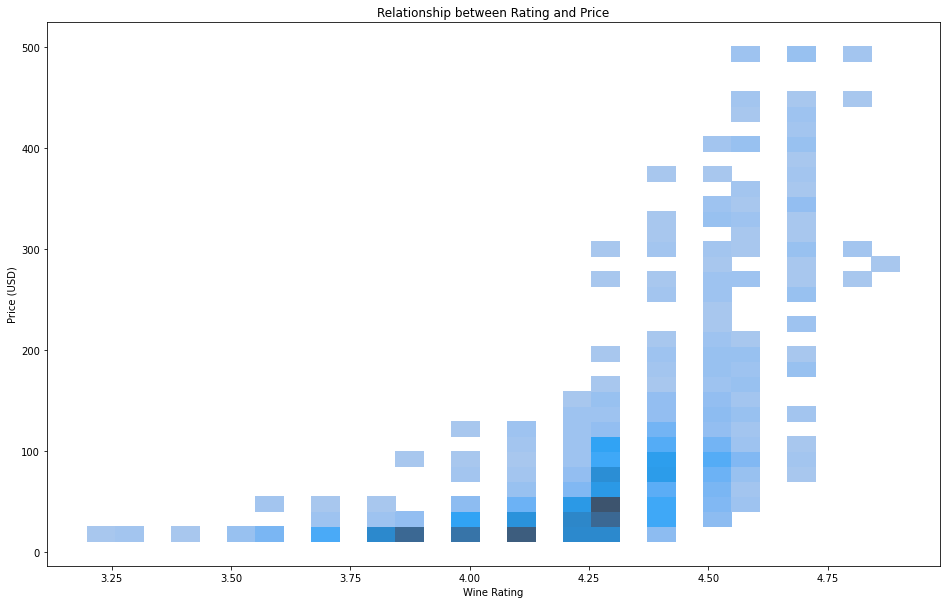

In [19]:
plt.figure(figsize = (16, 10))
sns.histplot(data = data, x = 'rating', y = 'price')
plt.xlabel('Wine Rating')
plt.ylabel('Price (USD)')
plt.title('Relationship between Rating and Price')
plt.show()

#### Analysis

<p> From the plot above, we can see that the higher the rating, the higher the price of a wine. This also means that the price of a bottle of wine is correlated to the rating  
</p>

#### Which wine type has the highest average rating?

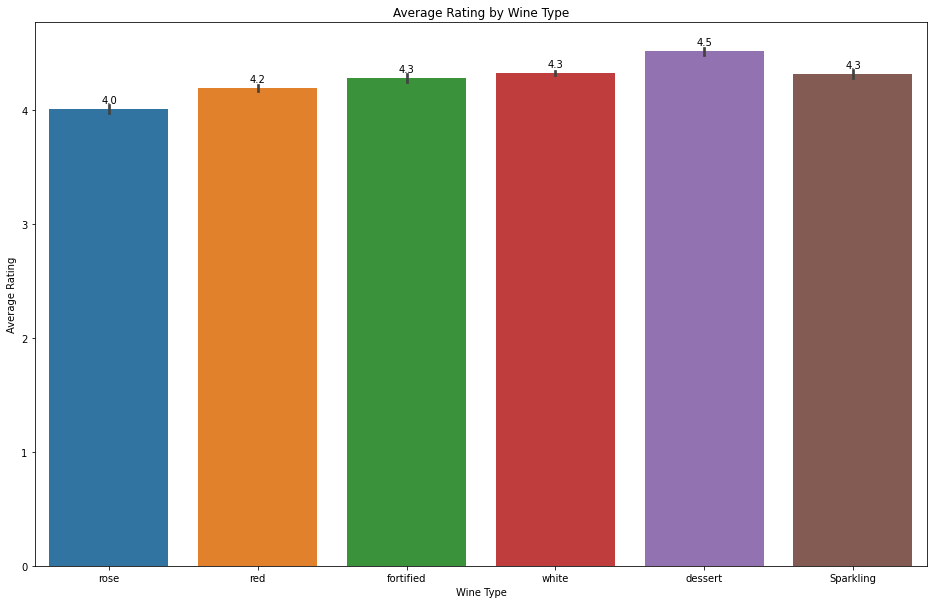

In [20]:
plt.figure(figsize = (16, 10))
plots = sns.barplot(data = data, x = 'type', y = 'rating')
for plot in plots.patches:
    plots.annotate(format(plot.get_height(), '.1f'), 
                   (plot.get_x() + plot.get_width() / 2., plot.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xlabel('Wine Type')
plt.ylabel('Average Rating')
plt.title('Average Rating by Wine Type')
plt.show()

#### Analysis
<p> The Dessert Type has the highest average wine rating of 4.5 with Rose having the least with 4.0</p>

#### What is the distribution of prices for each wine type in the dataset?

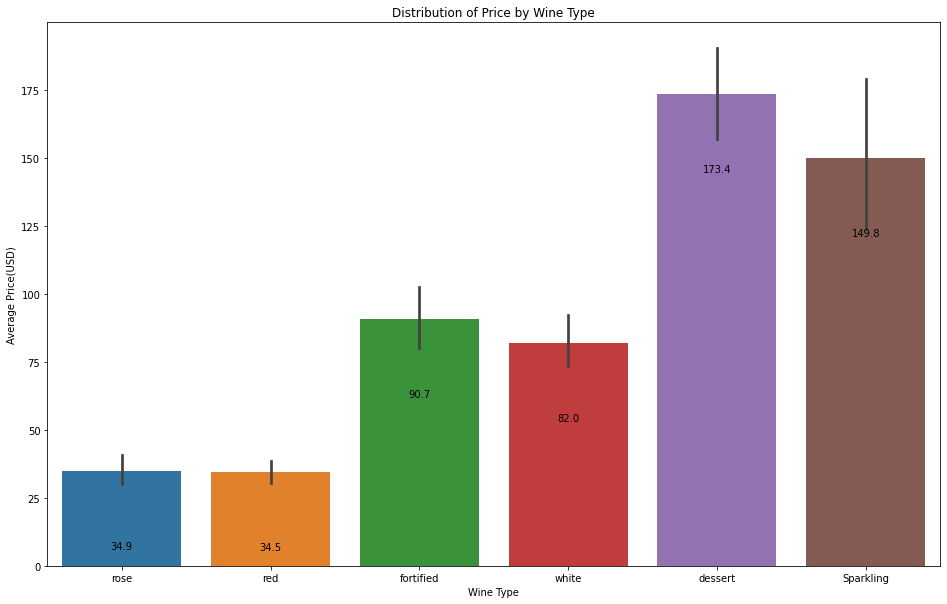

In [21]:
plt.figure(figsize = (16, 10))
plots = sns.barplot(data = data, x = 'type', y = 'price')
for plot in plots.patches:
    plots.annotate(format(plot.get_height(), '.1f'), 
                   (plot.get_x() + plot.get_width() / 2., plot.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, -75), 
                   textcoords = 'offset points')
plt.xlabel('Wine Type')
plt.ylabel('Average Price(USD)')
plt.title('Distribution of Price by Wine Type')
plt.show()

#### Analysis
<p> From the above plot, we can see that the most expensive type of wine is the Dessert which is also the type of wine with the highest rating. This can also mean that there is a positive correlation between the rating and price of a wine type</p>

#### Which country produces the most wine in the dataset?

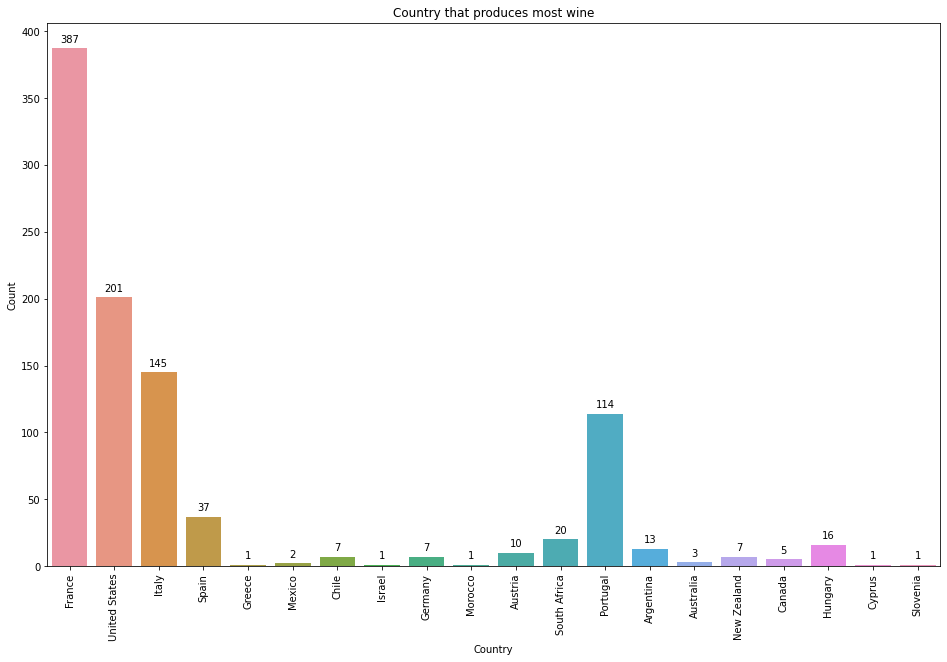

In [22]:
plt.figure(figsize = (16, 10))
plots = sns.countplot(data = data, x = 'country')
for plot in plots.patches:
    plots.annotate(format(plot.get_height()), 
                   (plot.get_x() + plot.get_width() / 2., plot.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Country that produces most wine')
plt.xticks(rotation = 90)
plt.show()

#### Analysis
<p> The country that produces most wines in the dataset is France with over 40% of the total wine coming from France </p>

#### Which country produces the best wine based on the ratings?

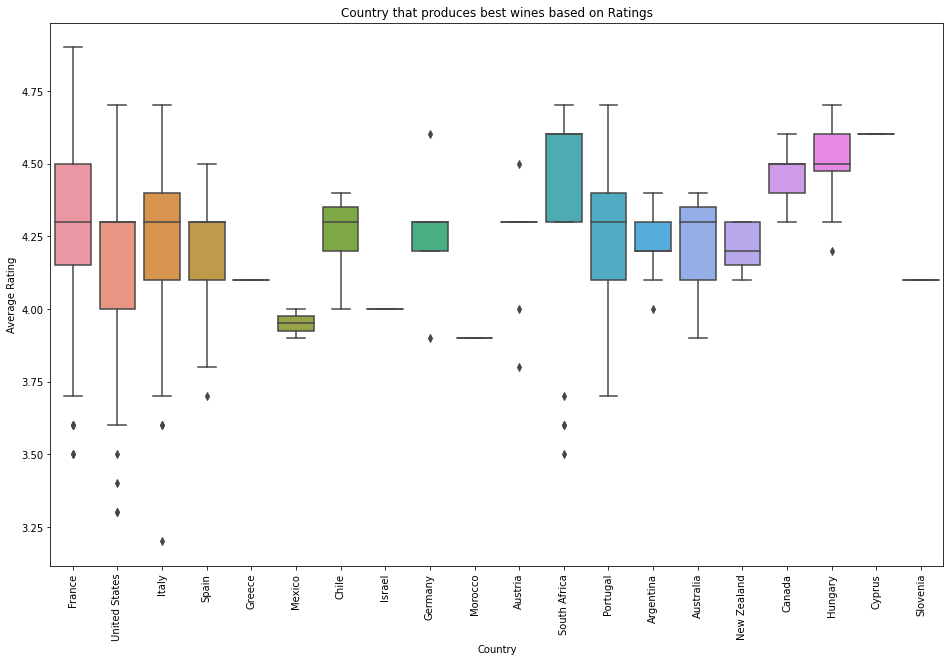

In [23]:
plt.figure(figsize = (16, 10))
sns.boxplot(data = data, x = 'country', y = 'rating')
plt.xlabel('Country')
plt.ylabel('Average Rating')
plt.title('Country that produces best wines based on Ratings')
plt.xticks(rotation = 90)
plt.show()

#### Analysis 
From the above plot we can see that France has a wider range of wines based on ratings, but the Italians average rating is slightly higher than the French wine but also has a short range of wines.

I would not be considering countries like Cyprus because it does not have enough wine record in this dataset to determine it's avarage rating

#### Does the year of production affect the Price of the Wine?

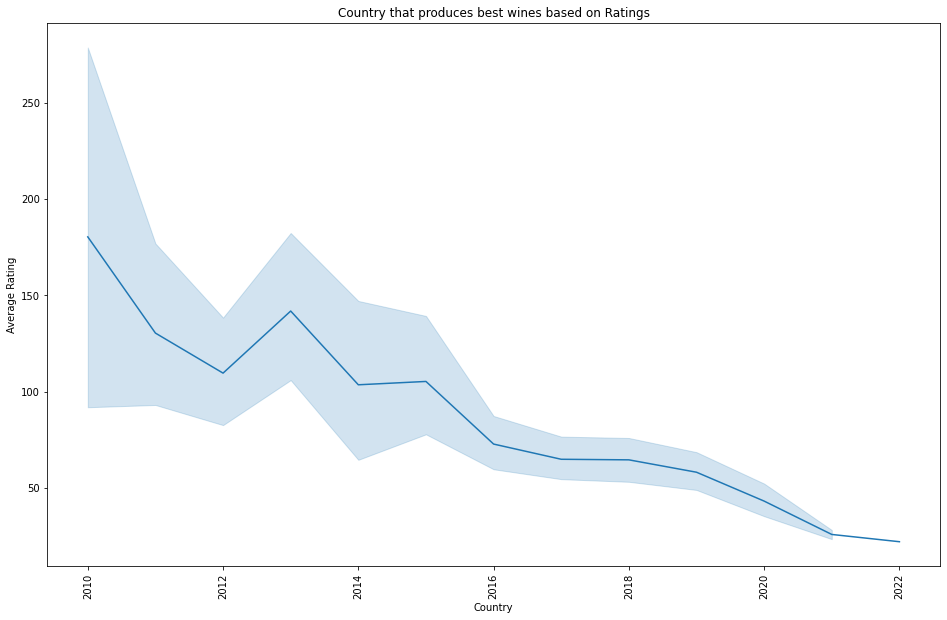

In [24]:
yrs = data.loc[data['year'] >= 2010]

plt.figure(figsize = (16, 10))
sns.lineplot(data = yrs, x = 'year', y = 'price')
plt.xlabel('Country')
plt.ylabel('Average Rating')
plt.title('Country that produces best wines based on Ratings')
plt.xticks(rotation = 90)
plt.show()

#### Analysis
To answer this question, I filtered out the wines that were produced in the last 10 years.
From the above plot, you can see that, the older the wine, the more expensive it is and the price of wine continues to fall until it reaches the current year.
I believe this is because, old wines are harder to find and very few. So this affects the price of the wine.